In [169]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [170]:
!gdown 1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_ # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_
To: /content/spotify-songs.csv
100% 1.82M/1.82M [00:00<00:00, 135MB/s]


In [171]:
df=pd.read_csv("/content/spotify-songs.csv")

In [172]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

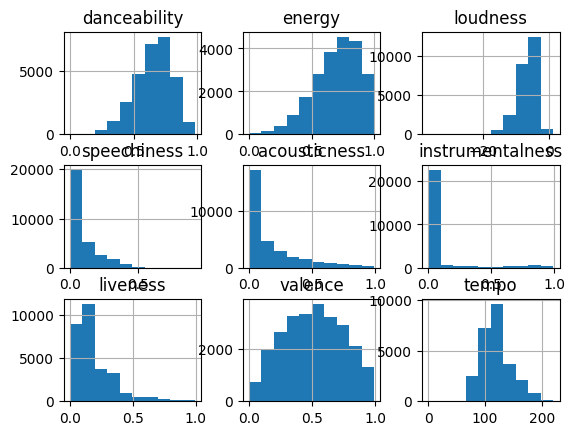

In [173]:
df.hist()


In [174]:
df.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [175]:
df.genre.value_counts()

edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: genre, dtype: int64

<Axes: >

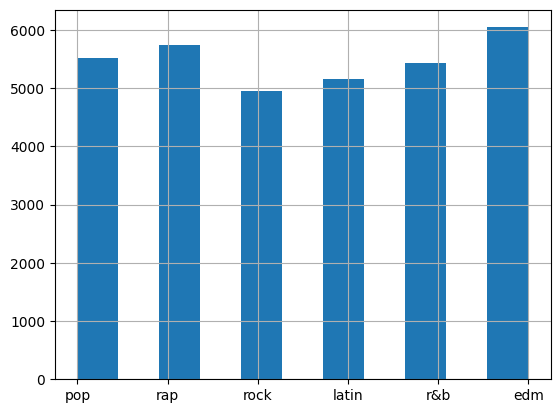

In [176]:
df.genre.hist(bins=11)

In [177]:
dff=df.copy()

In [178]:
from sklearn.preprocessing import LabelEncoder

In [179]:
le=LabelEncoder()

In [180]:
dff['genre']=le.fit_transform(dff['genre'])

In [181]:
missing_values=dff.isnull().sum()

In [182]:
procentage=missing_values/len(df)*100

In [183]:
missing_values_tebele=pd.concat([missing_values,procentage],axis=1)
missing_values_tebele.columns=['number od missing values','procentage of missing values']
missing_values_tebele

,number od missing values,procentage of missing values
danceability,3662,11.153413
energy,11261,34.297810
loudness,7620,23.208357
speechiness,2361,7.190936
acousticness,894,2.722870
instrumentalness,6470,19.705784
liveness,2986,9.094509
valence,7489,22.809369
tempo,6557,19.970761
genre,0,0.000000


<Axes: >

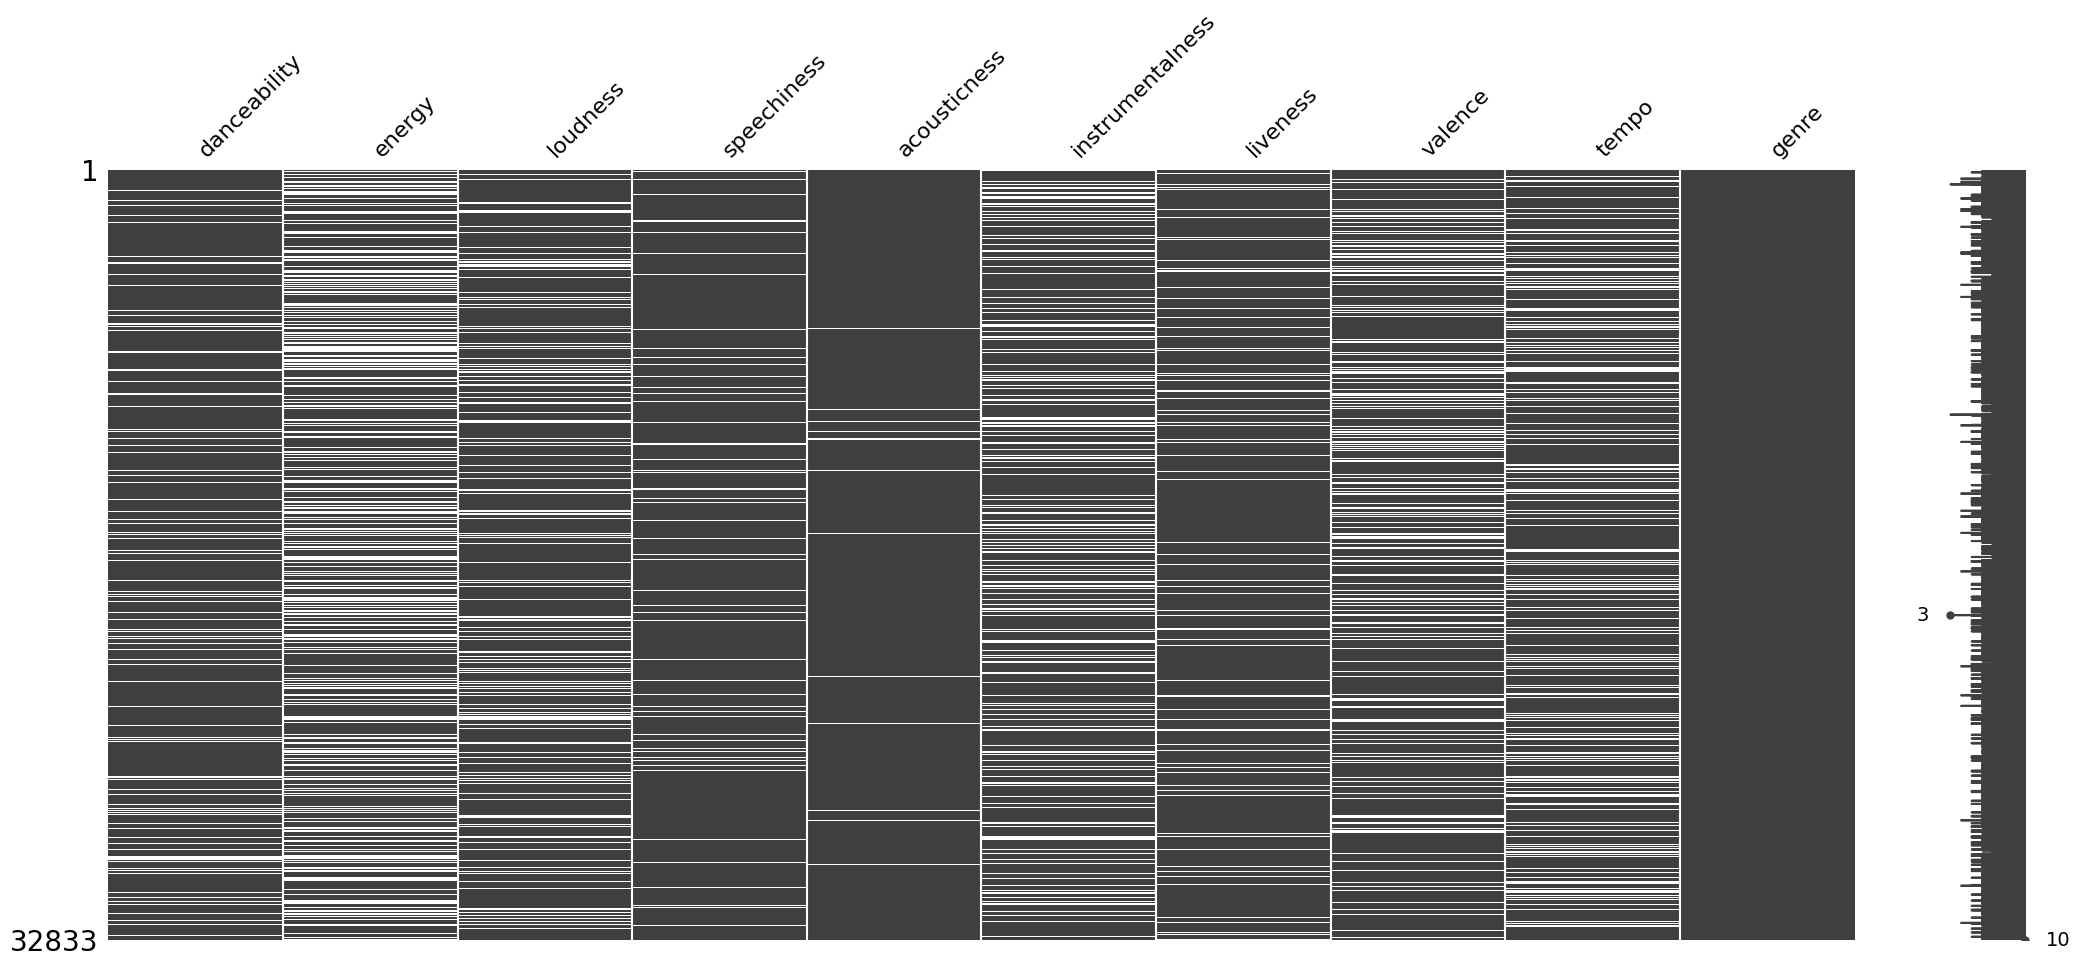

In [184]:
msno.matrix(dff)

<Axes: >

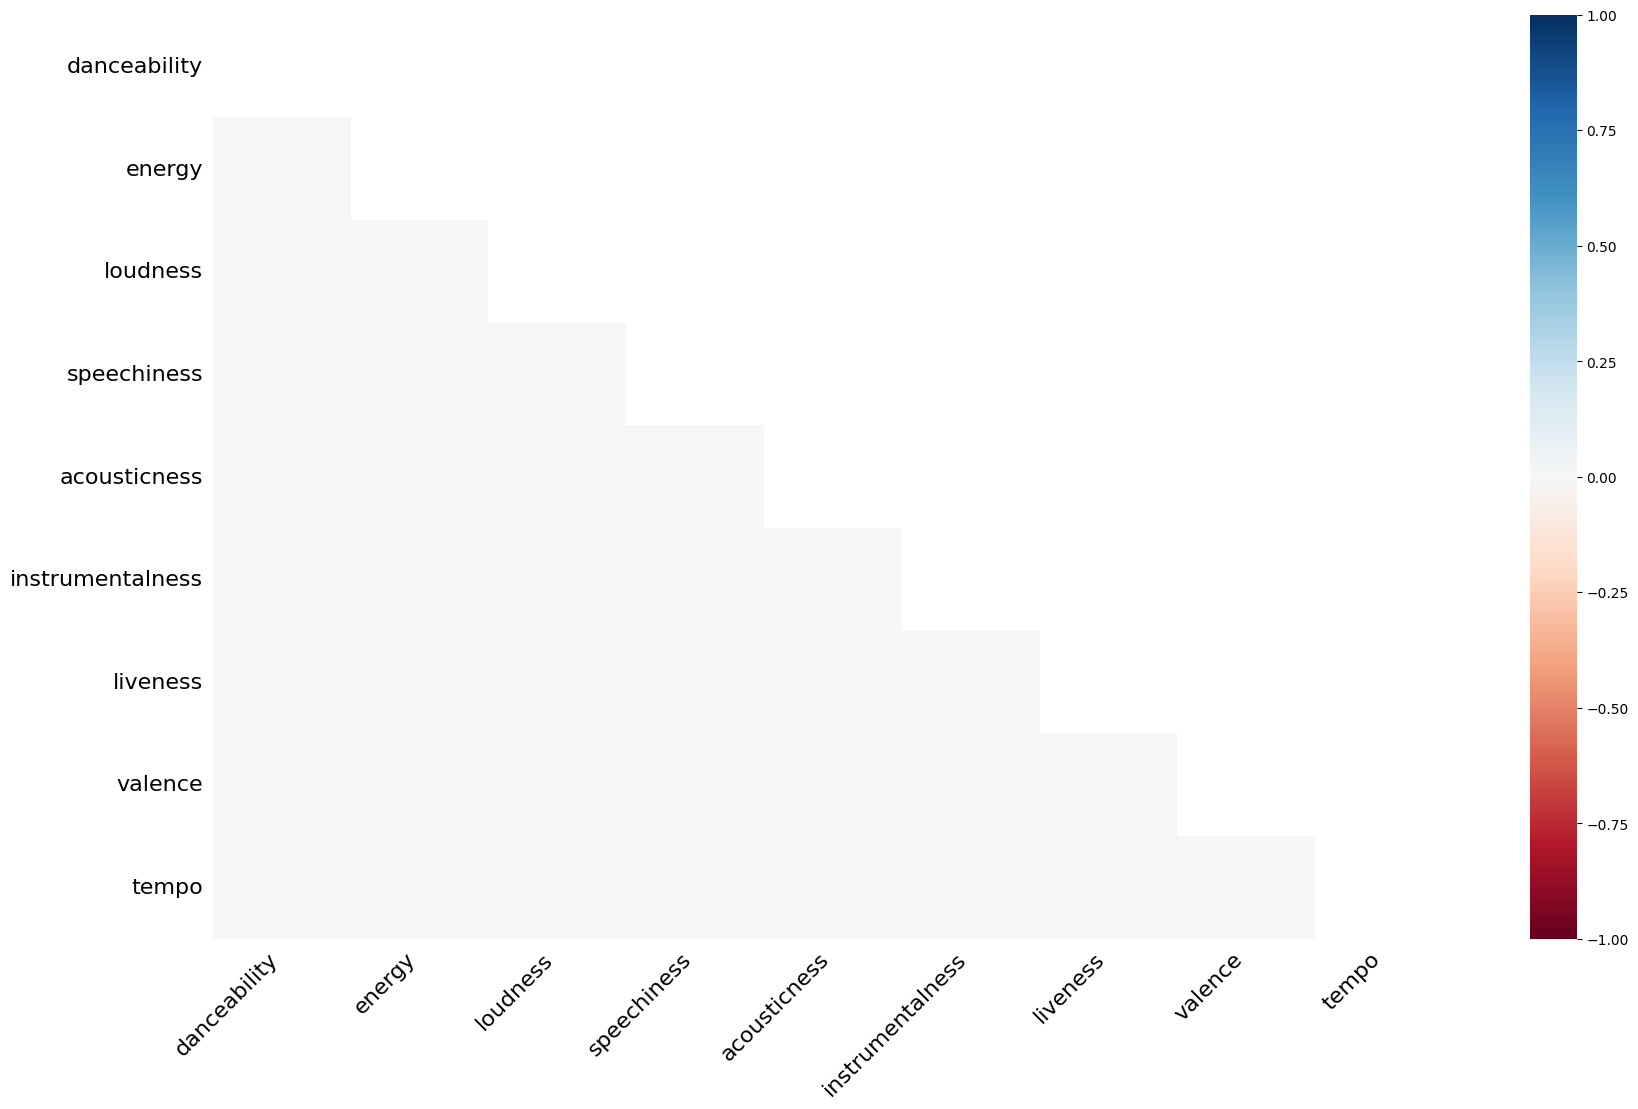

In [185]:
msno.heatmap(dff)

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'genre'}>, <Axes: >, <Axes: >]],
      dtype=object)

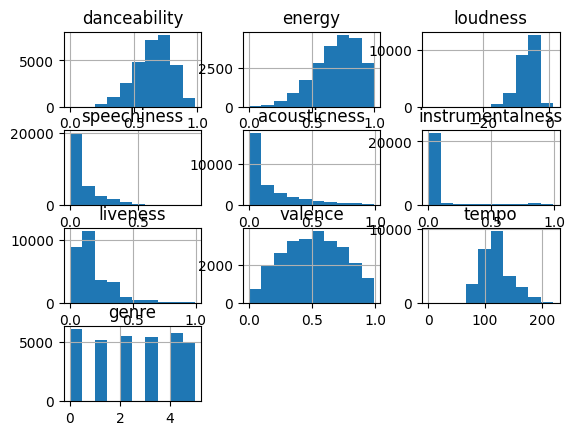

In [186]:
dff.hist()

In [187]:
ds=dff.copy()

In [188]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
colms=['danceability','valence','energy']
ds[colms]=imputer.fit_transform(dff[colms])

In [189]:
ds.isnull().sum()

danceability           0
energy                 0
loudness            7620
speechiness         2361
acousticness         894
instrumentalness    6470
liveness            2986
valence                0
tempo               6557
genre                  0
dtype: int64

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [191]:
columnsToScaler=['loudness','speechiness','acousticness','instrumentalness']
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)

In [192]:
scaled_data=scaler.fit_transform(ds[columnsToScaler])

In [193]:
inputer_data=knn.fit_transform(scaled_data)

In [194]:
ds[columnsToScaler]=scaler.inverse_transform(inputer_data)

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'genre'}>, <Axes: >, <Axes: >]],
      dtype=object)

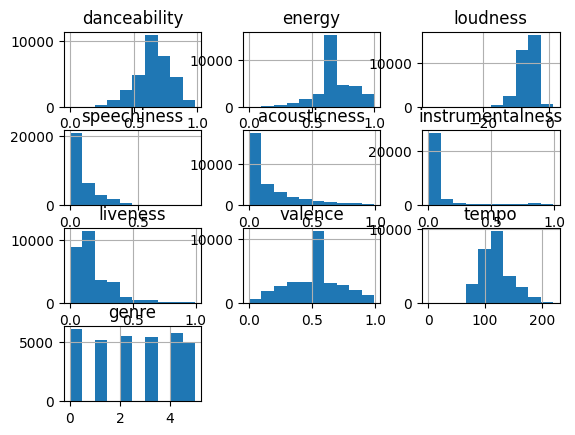

In [195]:
ds.hist()

In [196]:
ds.isnull().sum()

danceability           0
energy                 0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness            2986
valence                0
tempo               6557
genre                  0
dtype: int64

In [197]:
ds['liveness']=ds['liveness'].fillna(method='ffill')

In [198]:
ds['tempo']=ds['tempo'].fillna(value=ds['tempo'].median())

In [199]:
ds.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'genre'}>, <Axes: >, <Axes: >]],
      dtype=object)

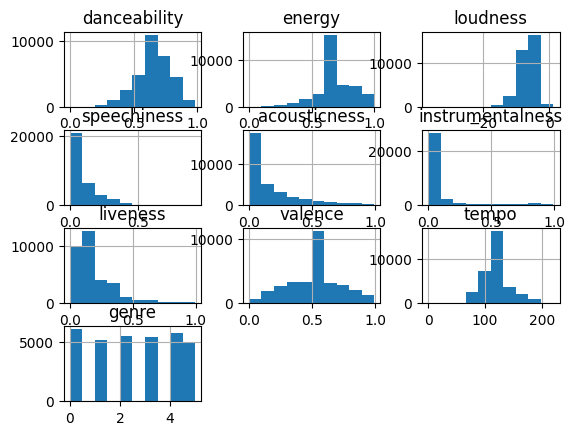

In [200]:
ds.hist()

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
ds.genre.value_counts()

0    6043
4    5746
2    5507
3    5431
1    5155
5    4951
Name: genre, dtype: int64

In [203]:
sacler=MinMaxScaler()

In [204]:
ds.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'genre'],
      dtype='object')

In [205]:
columns=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

In [206]:
ds[columns]=scaler.fit_transform(ds[columns])

In [207]:
X,Y=ds.drop(columns=['genre']),ds['genre']

In [208]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [209]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26266, 9) (6567, 9) (26266,) (6567,)


In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
knn=KNeighborsClassifier(n_neighbors=5)

In [212]:

ds

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.760936,0.915985,0.896857,0.063508,0.102616,0.000000,0.065694,0.523232,0.554074,2
1,0.738555,0.697911,0.835246,0.040632,0.072837,0.012306,0.359155,0.700000,0.453898,2
2,0.686673,0.930988,0.875801,0.080828,0.079879,0.161992,0.110664,0.619192,0.563028,2
3,0.730417,0.929988,0.866672,0.111111,0.028873,0.000009,0.205231,0.279798,0.553811,2
4,0.661241,0.832971,0.843083,0.039107,0.080785,0.000000,0.083803,0.732323,0.562883,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.435402,0.697911,0.918494,0.101961,0.077062,0.000000,0.067203,0.212121,0.581924,0
32829,0.531027,0.785963,0.848624,0.045752,0.001720,0.004296,0.377264,0.404040,0.581339,0
32830,0.538149,0.820969,0.837093,0.052397,0.108652,0.179611,0.150905,0.440404,0.581103,0
32831,0.636826,0.697911,0.854276,0.118736,0.007968,0.127767,0.345070,0.311111,0.581189,0


In [213]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [214]:
y_pred=knn.predict(X_test)

In [215]:
y_pred

array([2, 3, 3, ..., 4, 5, 1])

In [217]:
print(y_pred)

[2 3 3 ... 4 5 1]


In [218]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score

In [219]:
confusion_matrix(Y_test,y_pred)

array([[729, 128, 177,  58,  52,  73],
       [182, 365, 157, 136, 126,  41],
       [268, 196, 274, 159,  75, 120],
       [136, 237, 186, 280, 175,  90],
       [158, 188, 123, 221, 474,  37],
       [174,  92, 162, 126,  18, 374]])

In [221]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.60      0.51      1217
           1       0.30      0.36      0.33      1007
           2       0.25      0.25      0.25      1092
           3       0.29      0.25      0.27      1104
           4       0.52      0.39      0.45      1201
           5       0.51      0.40      0.44       946

    accuracy                           0.38      6567
   macro avg       0.38      0.38      0.38      6567
weighted avg       0.39      0.38      0.38      6567



In [224]:
# scores = []
# for k in range(1, 15):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, Y_train)
#     preds = knn.predict(X_test)
#     sc = f1_score(preds, Y_test)
#     scores.append(sc)

In [225]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.3800822293284605


In [232]:
kn=[]
scores = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_test)
    kn.append(k)
    sc = [metrics.accuracy_score(Y_test, preds)]
    scores.append(sc)

In [233]:
import matplotlib.pyplot as plt

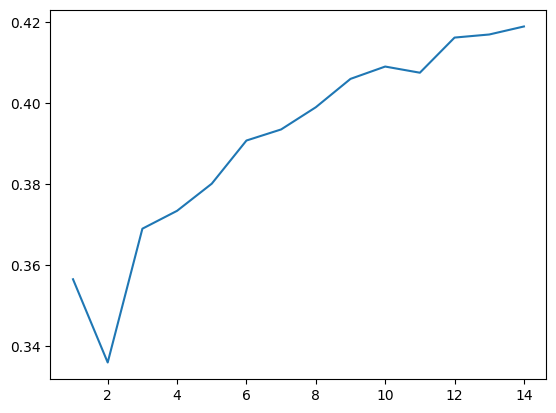

In [234]:
plt.plot(kn, scores)

In [246]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,Y_train)

y_predd = classifier.predict(X_test)

In [247]:
metrics.accuracy_score(Y_test,y_predd)

0.3750571037003198

In [239]:
metrics.accuracy_score(Y_test,y_pred)

0.3800822293284605

In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)

In [250]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, n_estimators=1500)

In [267]:
y_predr = rf.predict(X_test)

In [268]:
#metrics.accuracy_score(Y_test,y_predr)

ValueError: ignored

In [256]:
from sklearn.metrics import mean_squared_error


In [260]:
mean_squared_error(Y_test,y_pred)

1.937892367689417

In [264]:
mean_squared_error(Y_test,y_predd)

3.6834170854271355

In [269]:
#mean_squared_error(Y_test,y_predr)

In [271]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns 'Decimal', 'Boolean', and 'String'
data = pd.DataFrame({
    'Decimal': [1.5, 2.3, 3.8, 2.5, 1.0],
    'Boolean': [True, False, True, True, False],
    'String': ['Category1', 'Category2', 'Category1', 'Category3', 'Category2']
})

array([[<Axes: title={'center': 'Decimal'}>]], dtype=object)

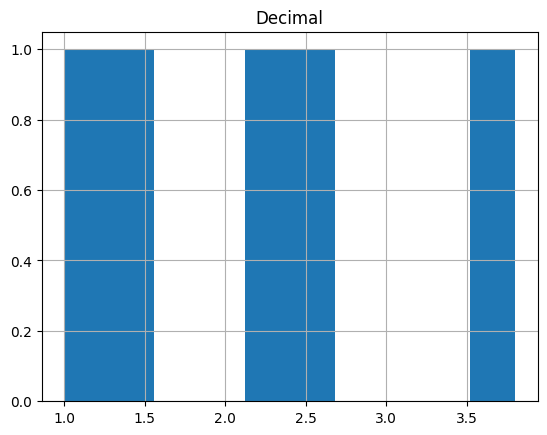

In [272]:
data.hist()